In [1]:
!git clone https://github.com/TharunSivamani/Pytorch.git
%cd Pytorch/VAE/

Cloning into 'Pytorch'...
remote: Enumerating objects: 540, done.
remote: Counting objects: 100% (540/540), done.
remote: Compressing objects: 100% (492/492), done.
remote: Total 540 (delta 84), reused 479 (delta 28), pack-reused 0
Receiving objects: 100% (540/540), 17.05 MiB | 20.83 MiB/s, done.
Resolving deltas: 100% (84/84), done.
/content/Pytorch/VAE


In [2]:
! pip install git+https://github.com/PytorchLightning/lightning-bolts.git@master --upgrade --quiet
! pip install -r requirements.txt --quiet

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.5/829.5 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 13.9 MB/s eta 0:00:00


In [3]:
import torch
import pytorch_lightning as pl
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

from config import *
from model.VAELitModel import VAELitModel
from datamodule.cifar10 import CIFAR10DataModule

pl.seed_everything(1234)

/usr/local/lib/python3.10/dist-packages/pl_bolts/models/self_supervised/amdim/amdim_module.py:34: UnderReviewWarning: The feature generate_power_seq is currently marked under review. The compatibility with other Lightning projects is not guaranteed and API may change at any time. The API and functionality may change without warning in future releases. More details: https://lightning-bolts.readthedocs.io/en/latest/stability.html
  "lr_options": generate_power_seq(LEARNING_RATE_CIFAR, 11),
/usr/local/lib/python3.10/dist-packages/pl_bolts/models/self_supervised/amdim/amdim_module.py:93: UnderReviewWarning: The feature FeatureMapContrastiveTask is currently marked under review. The compatibility with other Lightning projects is not guaranteed and API may change at any time. The API and functionality may change without warning in future releases. More details: https://lightning-bolts.readthedocs.io/en/latest/stability.html
  contrastive_task: Union[FeatureMapContrastiveTask] = FeatureMapCon

1234

In [4]:
datamodule = CIFAR10DataModule(
    data_dir=DATA_DIR,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS
)
vae = VAELitModel()

trainer = pl.Trainer(
    gpus=1,
    max_epochs=30
)
trainer.fit(vae, datamodule)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/content/Pytorch/VAE/model/VAELitModel.py:19: UnderReviewWarning: The feature resnet18_encoder is currently marked under review. The compatibility with other Lightning projects is not guaranteed and API may change at any time. The API and functionality may change without warning in future releases. More details: https://lightning-bolts.readthedocs.io/en/latest/stability.html
  self.encoder = resnet18_encoder(False, False)
/usr/local/lib/python3.10/dist-packages/pl_bolts/models/autoencoders/components.py:326: UnderReviewWarning: The feature ResNetEncoder is currently marked under review. The compatibility with other Lightning projects is 

100%|██████████| 170498071/170498071 [00:05<00:00, 31487587.56it/s]


Extracting /content/cifar-10-python.tar.gz to /content/


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type          | Params
--------------------------------------------------
0 | encoder         | ResNetEncoder | 11.2 M
1 | decoder         | ResNetDecoder | 8.6 M 
2 | fc_mu           | Linear        | 131 K 
3 | fc_var          | Linear        | 131 K 
4 | label_embedding | Embedding     | 5.1 K 
--------------------------------------------------
20.1 M    Trainable params
0         Non-trainable params
20.1 M    Total params
80.249    Total estimated model params size (MB)
/usr/local/lib/python3.10/dist-packages/torch/utils/tensorboard/__init__.py:4: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if not hasattr(tensorboard, "__version__") or LooseVersion(


Training: 0it [00:00, ?it/s]

Epoch: 1 | Loss: 4273.89013671875
Epoch: 2 | Loss: 3686.212646484375
Epoch: 3 | Loss: 3376.5146484375
Epoch: 4 | Loss: 3149.106201171875
Epoch: 5 | Loss: 3004.936279296875
Epoch: 6 | Loss: 2853.5185546875
Epoch: 7 | Loss: 2739.35546875
Epoch: 8 | Loss: 2674.783935546875
Epoch: 9 | Loss: 2601.543212890625
Epoch: 10 | Loss: 2527.000732421875
Epoch: 11 | Loss: 2479.690673828125
Epoch: 12 | Loss: 2464.467529296875
Epoch: 13 | Loss: 2445.6826171875
Epoch: 14 | Loss: 2424.9931640625
Epoch: 15 | Loss: 2406.596923828125
Epoch: 16 | Loss: 2389.819091796875
Epoch: 17 | Loss: 2373.97705078125
Epoch: 18 | Loss: 2364.9775390625
Epoch: 19 | Loss: 2350.695068359375
Epoch: 20 | Loss: 2338.201171875
Epoch: 21 | Loss: 2326.4443359375
Epoch: 22 | Loss: 2317.473876953125
Epoch: 23 | Loss: 2306.77099609375
Epoch: 24 | Loss: 2294.44384765625
Epoch: 25 | Loss: 2285.037109375
Epoch: 26 | Loss: 2277.263916015625
Epoch: 27 | Loss: 2269.67236328125
Epoch: 28 | Loss: 2259.14990234375
Epoch: 29 | Loss: 2253.055175

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=30` reached.


Epoch: 30 | Loss: 2247.6708984375


In [5]:
test_loader = datamodule.test_dataloader()

dataiter = iter(test_loader)
data_next = next(dataiter)
images, labels = data_next

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
labels_inc = []

for i in labels:
    incorrect_label = torch.randint(low=0, high=10, size=(1,)).item()

    while incorrect_label == i:
        incorrect_label = torch.randint(low=0, high=10, size=(1,)).item()

    labels_inc.append(incorrect_label)

In [7]:
device = "cpu"

labels_corr = torch.IntTensor(labels_inc)
images, labels_corr = images.to(device), labels_corr.to(device)

with torch.no_grad():
    pred = vae((images, labels_corr))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


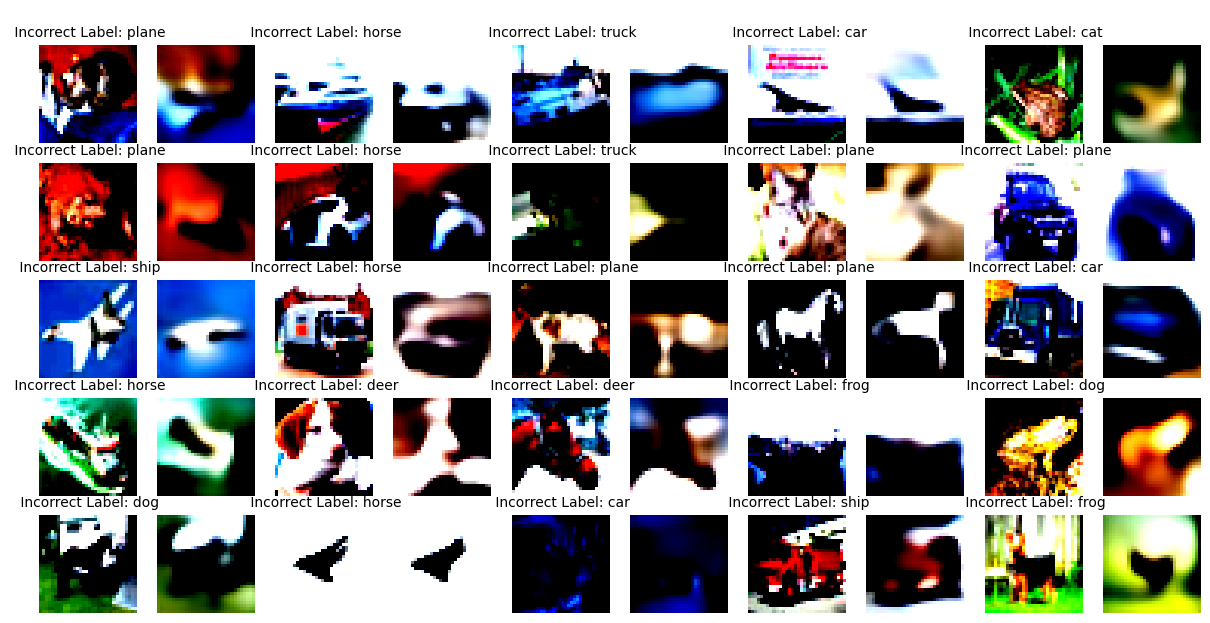

In [9]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

ind = 0
fig = plt.figure(figsize=(15,15))
for i in range(25):
    lbl_corr = labels[i]
    img_corr = images[i]
    img_new = pred[i]
    lbl_new = labels_corr[i]
    ind = ind+1
    ax = fig.add_subplot(10, 10,ind )
    ax.axis("off")
    ax.imshow(np.transpose(img_corr.squeeze(0).cpu().numpy(), (1, 2, 0)))
    ax.set_title(f'\n Incorrect Label: {classes[lbl_new.detach()]}',fontsize=10)
    ind = ind+1
    ax = fig.add_subplot(10, 10, ind)
    ax.axis("off")
    ax.imshow(np.transpose(img_new.squeeze(0).cpu().detach().numpy(), (1, 2, 0)))